![Astrofisica Computacional](../logo.png)

---
## 13. Image Stacking


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### About this notebook

In this worksheet we use the stacking technique to improve the signal to noise ratio of some synthetic images.

---

This lesson is inspired by the course *Data-Driven Astronomy* by the University of Sydney.

https://www.coursera.org/learn/data-driven-astronomy



---

## 02. Image of a Neutron Star

In this exercise we will use the datafiles provided in the course *Data-Driven Astronomy* by the University of Sydney.

https://www.coursera.org/learn/data-driven-astronomy


The .fits images correspond to the images of a region of the sky in which a neutron star or pulsar have been observed. The 4 files can be downloaded from

https://github.com/ashcat2005/data-driven-astronomy/tree/master/week1/data3


---


### Images of the .fits files

In [1]:
from matplotlib import pyplot as plt
from astropy.io import fits
import numpy as np
%matplotlib inline

The first image is

In [2]:
hdul = fits.open('data/image0.fits')

The method `.info()` returns a summary of the content of the FITS file.

In [3]:
hdul.info()

Filename: data/image0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (200, 200)   float64   


The header of the primary HDU has the following information

In [4]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  200                                                  
NAXIS2  =                  200                                                  
NUM     =                 1700                                                  
P       = 'P       '                                                            

Now, lets see the data,

In [5]:
image_data = hdul[0].data
hdul.close()
image_data.shape

(200, 200)

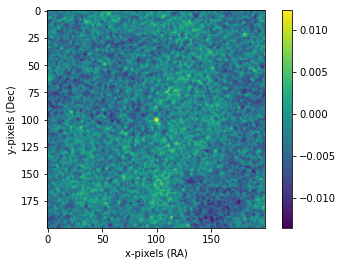

In [6]:
plt.figure()
plt.imshow(image_data, cmap=plt.cm.viridis)
plt.xlabel('x-pixels (RA)')
plt.ylabel('y-pixels (Dec)')
plt.colorbar()
plt.show()

In [7]:
files = ['data/image0.fits', 'data/image1.fits', 'data/image2.fits', 'data/image3.fits']

rawprofiles = np.zeros([4,200,200])

for i in range(4):
    hdul = fits.open(files[i])
    rawprofiles[i] = hdul[0].data
    hdul.close()


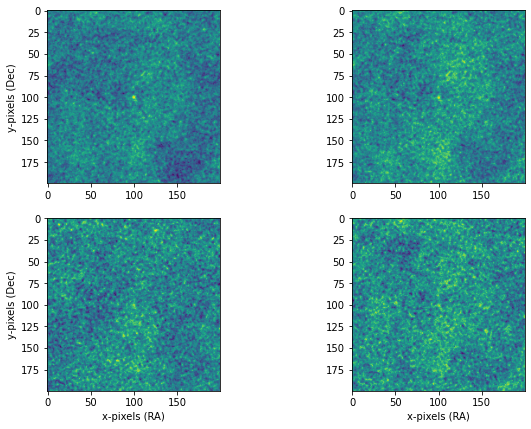

In [8]:
fig, ax = plt.subplots(2,2, figsize=(10,7))

ax[0,0].imshow(rawprofiles[0], cmap=plt.cm.viridis)
ax[0,0].set_ylabel('y-pixels (Dec)')
ax[0,1].imshow(rawprofiles[1], cmap=plt.cm.viridis)
ax[1,0].imshow(rawprofiles[2], cmap=plt.cm.viridis)
ax[1,0].set_ylabel('y-pixels (Dec)')
ax[1,0].set_xlabel('x-pixels (RA)')
ax[1,1].imshow(rawprofiles[3], cmap=plt.cm.viridis)
ax[1,1].set_xlabel('x-pixels (RA)')

plt.show()

---
### Image Mean Stacking 

In order to recover the source signal from the four raw images above, we will perform a mean stacking of the images.

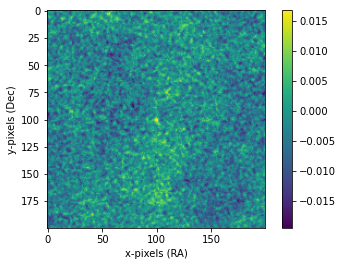

In [9]:
mean_recovered_signal = np.mean(rawprofiles, axis=0)

plt.figure()
plt.imshow(mean_recovered_signal, cmap=plt.cm.viridis)
plt.xlabel('x-pixels (RA)')
plt.ylabel('y-pixels (Dec)')
plt.colorbar()
plt.show()



### Image Median Stacking 

Now we can use the median stacking of images to obtain a similar result.

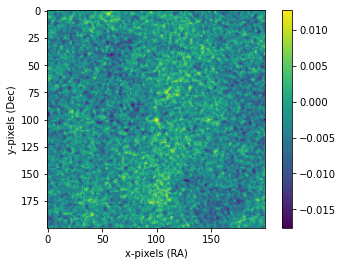

In [10]:
median_recovered_signal = np.median(rawprofiles, axis=0)

plt.figure()
plt.imshow(median_recovered_signal, cmap=plt.cm.viridis)
plt.xlabel('x-pixels (RA)')
plt.ylabel('y-pixels (Dec)')
plt.colorbar()
plt.show()

---
### Synthetic Images of an Astrophysical Source


We will create a synthetic image of an astrophysical image , modelled as a 2-dimensional Gaussian profile together with some random noise.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

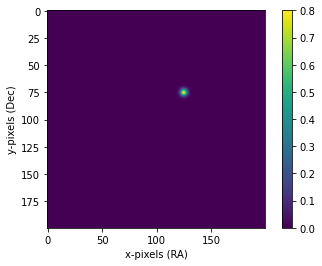

In [2]:
def gaussian(x,y):
  '''
  2-D Gausian profile
  '''
  return 0.8*np.exp(-((x-75)**2 + (y-125)**2)/10.)


# Signal creation. 200x200 pixels image
signal = np.zeros([200,200])

for i in range(200):
  for j in range(200):
    signal[i,j] = gaussian(i,j)



# Visualization of the pure signal
plt.figure()
plt.imshow(signal, cmap=plt.cm.viridis)
plt.xlabel('x-pixels (RA)')
plt.ylabel('y-pixels (Dec)')
plt.colorbar()
plt.show()

Now, we will add some random noise to this image

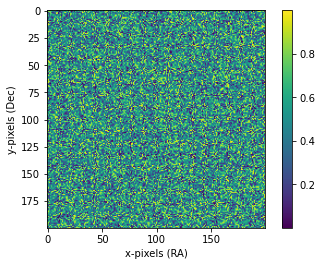

In [3]:
# Random noise image
np.random.seed(413)
noise = np.random.rand(200,200)

# Visualization of the noise
plt.figure()
plt.imshow(noise, cmap=plt.cm.viridis)
plt.xlabel('x-pixels (RA)')
plt.ylabel('y-pixels (Dec)')
plt.colorbar()
plt.show()

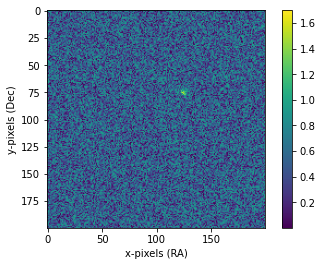

In [4]:
# raw image signal + noise
raw_image = signal + noise

plt.figure()
plt.imshow(raw_image, cmap=plt.cm.viridis)
plt.xlabel('x-pixels (RA)')
plt.ylabel('y-pixels (Dec)')
plt.colorbar()
plt.show()

Note that the source is seen as a bright point with a background of  random noise.

Now, we will create four independent images of the same source with random noise. We will also add a random amplitude for the Gaussian profile in order to simulate different observation conditions.

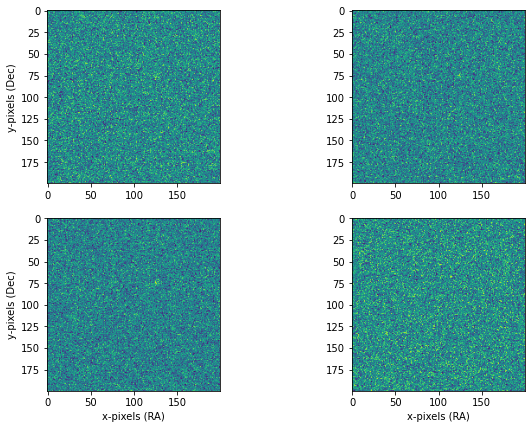

In [5]:
np.random.seed(413)
n = 50 # Number of profiles
rawprofiles = np.zeros([n,200,200])
for i in range(n):
  rawprofiles[i] =  signal*np.random.rand()\
                    + (np.random.rand(200,200) - np.random.rand(200,200))

fig, ax = plt.subplots(2,2, figsize=(10,7))

ax[0,0].imshow(rawprofiles[0], cmap=plt.cm.viridis)
ax[0,0].set_ylabel('y-pixels (Dec)')
ax[0,1].imshow(rawprofiles[1], cmap=plt.cm.viridis)
ax[1,0].imshow(rawprofiles[2], cmap=plt.cm.viridis)
ax[1,0].set_ylabel('y-pixels (Dec)')
ax[1,0].set_xlabel('x-pixels (RA)')

ax[1,1].imshow(rawprofiles[3], cmap=plt.cm.viridis)
ax[1,1].set_xlabel('x-pixels (RA)')

plt.show()

Note that the source is not easily seen through the random noise, i.e. the ratio signal/noise is not good! 

---
### Image Mean Stacking 

In order to recover the source signal from the four raw images above, we will perform a mean stacking of the images.

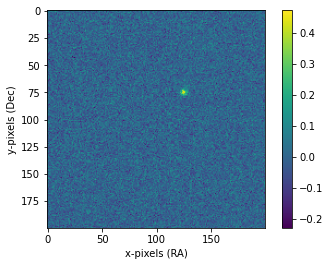

In [6]:
mean_recovered_signal = np.mean(rawprofiles, axis=0)

plt.figure()
plt.imshow(mean_recovered_signal, cmap=plt.cm.viridis)
plt.xlabel('x-pixels (RA)')
plt.ylabel('y-pixels (Dec)')
plt.colorbar()
plt.show()



### Image Median Stacking 

Now we can use the median stacking of images to obtain a similar result.

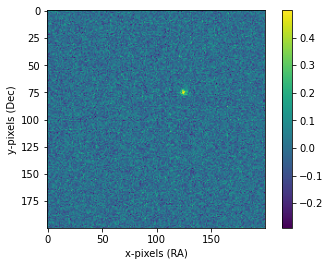

In [7]:
median_recovered_signal = np.median(rawprofiles, axis=0)

plt.figure()
plt.imshow(median_recovered_signal, cmap=plt.cm.viridis)
plt.xlabel('x-pixels (RA)')
plt.ylabel('y-pixels (Dec)')
plt.colorbar()
plt.show()